<a href="https://colab.research.google.com/github/pdthuc/Project-Applied_Data_Science/blob/main/Group12_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KHOA HỌC DỮ LIỆU & ỨNG DỤNG
### GVHD: TRẦN TRUNG KIÊN
### THỰC HIỆN: Nhóm 12
### DANH SÁCH THÀNH VIÊN
  1. 1712667 - Lê Hữu Phúc
  2. 18120167 - Nguyễn Viết Dũng
  3. 18120579 - Đặng Minh Thọ
  4. 18120584 - Phạm Đình Thục

# 1. GIỚI THIỆU ĐỀ TÀI
- **Tên cuộc thi:** Recruit Restaurant Visitor Forecasting
- **Mô tả tổng quan:** Dự đoán nhà hàng sẽ nhận được bao nhiêu khách trong tương lai
- **Link cuộc thi:** https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting
- **Link `TOP 8` Solution:** https://github.com/MaxHalford/kaggle-recruit-restaurant




# 2. SƠ LƯỢC VỀ DỮ LIỆU
Dữ liệu đến từ hai trang web riêng biệt: 
  - Hot Pepper Gourmet (hpg): tại đây người dùng có thể tìm kiếm nhà hàng và đặt chỗ trực tuyến 
  - AirREGI / Restaurant Board (air): hệ thống kiểm soát đặt chỗ và tính tiền
  
Được thu thập từ năm 2016 đến tháng 4 năm 2017 
- AIR: 829 restaurants 
- HPG: 4690 restaurants


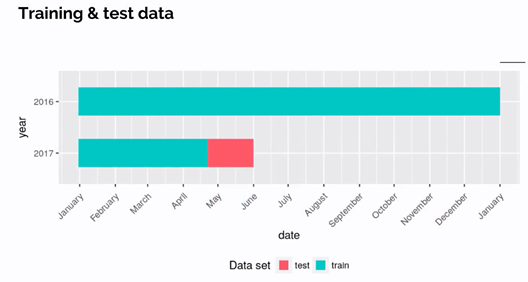


# 3. IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/KHDL")
!ls


import pandas as pd
import numpy as np


Mounted at /content/drive
data  Group12_Notebook.ipynb


# 4. KHÁM PHÁ DỮ LIỆU


---
## 4.1 File `air_visit_data.csv`

Trong file `air_visit_data.csv` liên quan về dữ liệu khách theo ngày: Trong file biểu diễn dữ liệu theo ngày (những ngày không có khách sẽ không được thu thập)

 -> Ta cần phải lấy mẫu theo ngày thay vì theo lượt truy cập. Do đó, những ngày không có khách thì lượt truy cập sẽ là 0. Có ích cho việc tính toán luân phiên dựa vào thời gian

In [ ]:
air_visit = pd.read_csv('data/air_visit_data.csv')
air_visit.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


* Sắp xếp dữ liệu theo ngày và thêm vào những này không được thu thập (số lượng khách bằng NaN)






In [ ]:
air_visit.index = pd.to_datetime(air_visit['visit_date'])
air_visit = air_visit.groupby('air_store_id').apply(lambda g: g['visitors'].resample('1d').sum()).reset_index()
air_visit.replace(0, np.nan, inplace=True)
air_visit.head()

,air_store_id,visit_date,visitors
0,air_00a91d42b08b08d9,2016-07-01,35.0
1,air_00a91d42b08b08d9,2016-07-02,9.0
2,air_00a91d42b08b08d9,2016-07-03,NaN
3,air_00a91d42b08b08d9,2016-07-04,20.0
4,air_00a91d42b08b08d9,2016-07-05,25.0


* Gán cờ cho những ngày không có khách

In [ ]:
air_visit['visit_date'] = air_visit['visit_date'].dt.strftime('%Y-%m-%d')
air_visit['was_nil'] = air_visit['visitors'].isnull()
air_visit['visitors'].fillna(0, inplace=True)

air_visit.head()

,air_store_id,visit_date,visitors,was_nil
0,air_00a91d42b08b08d9,2016-07-01,35.0,False
1,air_00a91d42b08b08d9,2016-07-02,9.0,False
2,air_00a91d42b08b08d9,2016-07-03,0.0,True
3,air_00a91d42b08b08d9,2016-07-04,20.0,False
4,air_00a91d42b08b08d9,2016-07-05,25.0,False


---
## 4.2 File `date_info.csv`
Trong file `date_info.csv` liên quan đến dữ liệu các ngày lễ. Ta thêm hai tính năng cho biết ngày hôm trước và ngày hôm sau là ngày lễ hay không?

 -> Điều này giúp ta biết được ngày đó là ngày lễ đơn hay là kỳ nghỉ lễ dài ngày

In [ ]:
date_info = pd.read_csv('data/date_info.csv')
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [ ]:
date_info.rename(columns={'holiday_flg': 'is_holiday', 'calendar_date': 'visit_date'}, inplace=True)
date_info['prev_day_is_holiday'] = date_info['is_holiday'].shift().fillna(0)
date_info['next_day_is_holiday'] = date_info['is_holiday'].shift(-1).fillna(0)

date_info.head()

,visit_date,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday
0,2016-01-01,Friday,1,0.0,1.0
1,2016-01-02,Saturday,1,1.0,1.0
2,2016-01-03,Sunday,1,1.0,0.0
3,2016-01-04,Monday,0,1.0,0.0
4,2016-01-05,Tuesday,0,0.0,0.0
